# Assignment 2: Classification
# Using Machine Learning Tools

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of classifying data from histological cell images for the diagnosis of malignant breast cancer. This will be presented as a practical scenario where you are approached by a client to solve a problem.  

The main aims of this assignment are:

- to use the best practice machine learning workflow for producing a solution to a client's problem;
- to visualise and clean data;
- to train and optimise a selection of models, then choose the best;
- to obtain an unbiased measurement of the final model's performance;
- to interpret results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task, but feel free to add additional cells to structure your notebook. Note that some questions require writing code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (**with the correct results displayed**) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code can run correctly on the original data file.

This assignment uses the standard best practice machine learning workflow, building on the first assignment and course workshops, and so less detailed instructions are provided for this assignment. You should be able to implement this workflow now without low-level guidance and a substantial portion of the marks for this assignment are associated with the appropriate choices and executing this workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), and [matplotlib](https://matplotlib.org/stable/index.html) as presented in the workshops. Other libraries should not be used (even though they might have nice functionality) and occasionally certain specific functions need to be used, which will be made clear in the instruction text. You are expected to make sure that you are using functions correctly, and you should search and carefully read the documentation if unsure.

# Scenario

A client approaches you to solve a machine learning problem for them.  They run a pathology lab that processes histological images for healthcare providers and they have created a product that measures most of the same features as in the *Wisconsin breast cancer data set* though using different acquisitions and processing methods. Their method employs efficient stochastic sampling, making it much faster than existing methods, although slightly noisier. This method does not measure any of the 'worst' features that appear in the *Wisconsin Breast Cancer Data Set*. They want to be able to diagnose *malignant* cancer (and distinguish them from *benign* growths) by employing machine learning techniques, and they have asked you to implement this for them.

Their requirements are:
 - 1) Have at least a 90% probability of detecting malignant cancer when it is present;
 - 2) Ensure that no more than 1 in 5 healthy cases (those with benign growths) result in a false positive (labeled as malignant).

They have hand-labelled 220 samples for you, with 20 features per sample, which is all they have at the moment.

Please follow the instructions below, which will vary in level of detail.

## 1. Load data, visualise it and identify erroneous values [30%]

 - Load the data from the csv file `assignment2_data_2024.csv` (found on MyUni).
 - Extract the feature names and label names for use later on.
 - Provide at least one text summary of the dataset. This should include key information and characteristics of the data.
 - Create one graphical plot per feature. Each plot must display the feature values for the two classes (malignant and benign) separately on a single axis/panel.
 - Make sure you clearly label the graphical plots with respect to feature names, axes, classes, etc.
 - Identify any erroneous values in the dataset during the data visualisation or summary steps. Determine and implement, here or later, the appropriate action to handle these values (e.g., removal, correction, or none).
 - Throughout this assignment, treat the _malignant_ cases as the _true positive_ class, following the standard convention in medicine.

In [1]:
# This code imports some libraries that you will need.
# You should not need to modify it, though you are expected to make other imports later in your code.

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

Firstly, we read the data from the provided csv file and see the head of the data

In [2]:
# Read data from csv
df = pd.read_csv('assignment2_data_2024.csv')

# Display the first few entries of the data
df.head()

,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
0,malignant,15.494653829645529,15.902542,103.008265,776.437239,0.104239,0.168660,0.170572,0.085668,0.205053,...,0.653654,1.096678,4.962255,80.619370,0.006669,0.034950,0.043568,0.013765,0.024093,0.004928
1,malignant,16.229870799611437,18.785613,105.176755,874.712003,0.091843,0.092548,0.081681,0.053670,0.180435,...,0.445451,1.043931,3.005373,50.407958,0.006352,0.019998,0.025324,0.012172,0.018084,0.003582
2,malignant,16.34567074196476,20.114076,107.083804,872.563251,0.099924,0.123799,0.128788,0.078310,0.189756,...,0.549625,1.057447,3.643671,62.732851,0.006757,0.031325,0.034350,0.015150,0.021459,0.004066
3,maligant,13.001009157806651,19.876997,85.889775,541.281012,0.113423,0.173069,0.146214,0.069574,0.212078,...,0.430693,1.202955,3.051434,33.614356,0.007930,0.044881,0.042972,0.014556,0.035670,0.005981
4,malignant,16.416060073302194,17.397533,107.857386,891.516818,0.097321,0.111530,0.125971,0.068575,0.179562,...,0.525532,1.045900,3.747194,59.164555,0.008718,0.024231,0.039763,0.014202,0.019236,0.004115


Now we extract the feature names and label names for use later on, in this case the label name is just called 'label'

In [3]:
# label is the name of the label column
label_column = 'label'

# Extract feature names (excluding the label column)
feature_names = df.columns[df.columns != label_column].tolist()

# Extract the label name
label_name = label_column

print("Feature Names:", feature_names)
print("Label Name:", label_name)

Feature Names: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']
Label Name: label


In [4]:
# Check basic information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    object 
 1   mean radius              220 non-null    object 
 2   mean texture             220 non-null    float64
 3   mean perimeter           220 non-null    float64
 4   mean area                220 non-null    float64
 5   mean smoothness          220 non-null    float64
 6   mean compactness         220 non-null    float64
 7   mean concavity           220 non-null    float64
 8   mean concave points      220 non-null    float64
 9   mean symmetry            220 non-null    float64
 10  mean fractal dimension   220 non-null    float64
 11  radius error             220 non-null    float64
 12  texture error            220 non-null    float64
 13  perimeter error          220 non-null    float64
 14  area error               2

**Data Summary**  
The dataset consists of 21 columns, where each row represents a sample. The columns include one label indicating whether the sample is malignant or benign, and 20 features describing various characteristics of the samples. Here is a summary of the columns:
- label: Class label indicating whether the sample is malignant or benign.
- mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension: Mean values of these characteristics.
- radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error: Error values (standard error) for these characteristics.

**Initial Observations**  
- **Potential typo in Label:** One of the labels has a typo ("maligant" instead of "malignant") from the first five rows of data, may contain more typo in later rows

Based on the previous steps, there are two things we need to fix now:
- **The typo in label column**: there has typo like 'maligant instead of 'malignant' in the label column, we need to fix them.
- **mean radius data type**: notice that the `mean radius` column has data type 'object' instead of 'float64' like other feature columns, which means system treat it as a catagorical feature instead of numerical feature. However, the mean radius should be a number, so there must contain some non-numerical mean radius rows in the dataset, so we need to convert that to numerical type

In [5]:
# Fixing the typo in label

# Print unique labels before fixing
print("Unique labels in the dataset before fixing:", df['label'].unique())

# Fix the typo in the label column
df['label'] = df['label'].replace({'maligant': 'malignant'})

# Print unique labels after fixing
print("Unique labels in the dataset after fixing:", df['label'].unique())

Unique labels in the dataset before fixing: ['malignant' 'maligant' 'benign']
Unique labels in the dataset after fixing: ['malignant' 'benign']


In [6]:
# Convert the mean radius to numerical type
df['mean radius'] = pd.to_numeric(df['mean radius'], errors='coerce')

After fixing these two problems, we now creat one graphical plot per feature. And each plot will display the feature values for the two class separately on a single axis.

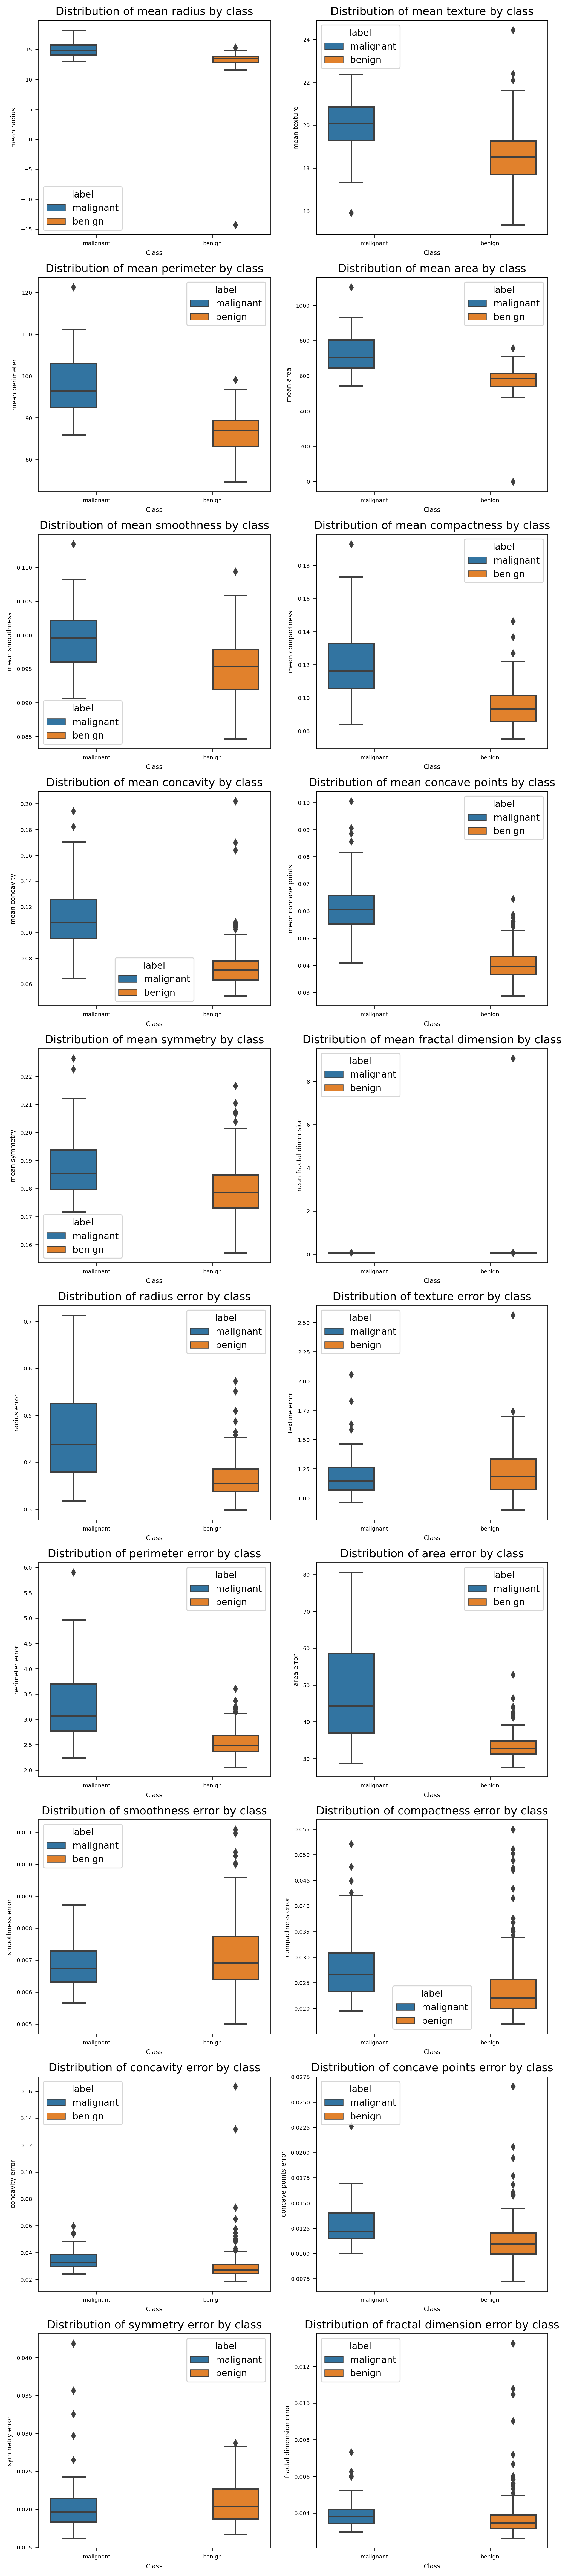

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature names and label name
features = df.columns[1:]
label = df.columns[0]

# Visualize each feature for the two classes
plt.figure(figsize=(10, 50))
for i, feature in enumerate(features):
    plt.subplot(10, 2, i + 1)
    sns.boxplot(x='label', y=feature, data=df, hue='label')
    plt.title(f'Distribution of {feature} by class')
    plt.xlabel('Class')
    plt.ylabel(feature)

In [8]:
# Check the statistical information of the dataset
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
count,219.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,219.000000,220.000000
mean,13.693313,18.991963,89.866240,620.956227,0.096480,0.102879,0.085281,0.046867,0.181850,0.103957,0.393337,1.217593,2.775090,37.781034,0.007076,0.025514,0.031901,0.011762,0.020901,0.003873
std,2.176062,1.427635,7.366180,106.419871,0.004961,0.019819,0.026911,0.012548,0.010816,0.606979,0.075828,0.210182,0.579317,9.988655,0.001043,0.007345,0.014102,0.002422,0.003250,0.001259
min,-14.292182,15.349270,74.690886,-2.645499,0.084651,0.075184,0.050771,0.028701,0.157059,0.058922,0.298005,0.898026,2.059186,27.693748,0.004994,0.016907,0.018730,0.007253,0.016181,0.002631
25%,13.092060,17.914319,84.911981,558.731832,0.092797,0.089531,0.066525,0.038106,0.174944,0.061139,0.343114,1.073344,2.394331,31.843894,0.006372,0.020530,0.025373,0.010336,0.018658,0.003225
50%,13.647143,18.928256,88.587737,603.806128,0.096457,0.098517,0.075748,0.042761,0.180953,0.062557,0.367863,1.165727,2.610732,34.007608,0.006837,0.023147,0.028835,0.011357,0.020193,0.003555
75%,14.272883,19.995859,93.066393,655.690435,0.099817,0.113276,0.098826,0.055337,0.186354,0.064184,0.420514,1.300769,3.003888,39.042484,0.007675,0.027733,0.033620,0.012669,0.022195,0.004046
max,18.200299,24.430831,121.247839,1103.740620,0.113423,0.192880,0.201971,0.100467,0.226448,9.065897,0.712896,2.561348,5.903661,80.619370,0.011088,0.054950,0.163592,0.026554,0.041861,0.013251


Now we need to identify any erroneous values in the dataset and replace them to nan for later pipeline to deal with.

First both from the boxplot and the date description, we can see there are some negative values in the `mean radius` and `mean area` which is unreasonable since these values can't be negative so we replace the negative value to nan

In [9]:
# Replace negative value with nan
df.loc[df['mean radius'] < 0, 'mean radius'] = np.nan
df.loc[df['mean area'] < 0, 'mean area'] = np.nan

Secondly, notice that in the plot of mean fractal dimension, there has a value larger than 8 while all other values are around 0, which is a obvious error. Also from the paper "Fractal Dimension Analysis to Detect the Progress of Cancer Using Transmission Optical Microscopy" (Elkington, Adhikari & Pradhan 2022), the actual fractal dimension of 1.7284 can be considered as stage III cancer, so it's very unreasonable to have over 8, thus we will replace it as nan.

In [10]:
# Replace the unreasonable fractal dimension with nan
df.loc[df['mean fractal dimension'] > 5, 'mean fractal dimension'] = np.nan

As for the other features, we can see there have some value outside the box of the boxplot, which could be considered as potential outliers, but we have no enough background knowledge and confidence to either remove this value or impute them. And even if do that is not very justified, since actually there has no obvious error values.

## 2. Prepare data and models, and make baseline measurements [20%]
 - Split data into appropriate sets using the `stratify` option to obtain consistent proportions of classes in each set.
 - Decide on appropriate pre-processing steps for the data.
 - Implement a _very_ simple baseline model that makes purely random predictions of the class.
 - Measure the baseline performance with the following metrics:
   - accuracy
   - balanced accuracy: accounts for imblanaced datasets, defined as _(sensitivity + specificity)/2_
   - recall
   - precision
   - auc
   - f1score
   - fbeta_scores with beta=0.1
   - fbeta_score with beta=10
 - Also display a confusion matrix for the baseline predictions.
 - As a second baseline, implement an SGD classifier and fit it once (without hyper-parameter optimisation) and then display the same performance metrics and a confusion matrix for its results.

In [11]:
# Some helpful code that you can use if you wish (or not)

from sklearn.metrics import fbeta_score, make_scorer

f10_scorer = make_scorer(fbeta_score, beta=10)
f01_scorer = make_scorer(fbeta_score, beta=0.1)

def f10_score(yt,yp):
    return fbeta_score(yt, yp, beta=10)

def f01_score(yt,yp):
    return fbeta_score(yt, yp, beta=0.1)

Here before we fit the data, we will first split the data using `stratify` option to obtain consisten proportions of classes. Then we make a preprocessing pipeline which including two parts, the first part is to impute the data that is set to nan in the previous step using median strategy, and then we standardlize the data using standard scaler.

Standardizing data is beneficial when performing machine learning tasks for several reasons:
- **Improving Model Convergence:** Many machine learning algorithms, particularly those involving iterative optimization processes like gradient descent, converge faster when the features are standardized. Standardizing the features ensures that they are on a similar scale, preventing any one feature from dominating the optimization process.
- **Handling Different Scales:**: In datasets where features have different units and scales, features with larger scales can disproportionately influence the model's predictions. Standardization mitigates this by scaling all features to have a mean of zero and a standard deviation of one, ensuring that each feature contributes equally to the model.

Before performing data imputation and preprocessing, we need to split the data into train, validation, and test set. We will use the train and validation to select the best model and test on the test set to get the final result. Here we use 25% of the data as our test data, and 75% as our train + validation data. Inside this 75%, the proportion of train compared to validaiton is 3:1, means 25% of the train_val data will be validation, and the rest be train.

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

# Splitting the data into training and test sets using stratification
X = df.drop(columns=['label'])
y = df['label'].apply(lambda x: 1 if x == 'malignant' else 0)  # Encoding labels: malignant as 1, benign as 0

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=3)

# Creating a preprocessing pipeline
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

Here we prepare a function for displaying all the following metrics:
- accuracy
- balanced accuracy
- precision
- auc
- f1score
- fbeta_scores with beta=0.1
- fbeta_score with beta=10
- confusion matrix

In [231]:
# Function to show all the performance metric
def show_result(y_true, y_pred, title):
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.3f}")
    print(f"Balanced accuracy: {balanced_accuracy_score(y_true, y_pred):.3f}")
    print(f"Recall: {recall_score(y_true, y_pred):.3f}")
    print(f"Precision: {precision_score(y_true, y_pred):.3f}")
    print(f"AUC: {roc_auc_score(y_true, y_pred):.3f}")
    print(f"F1 score:{f1_score(y_true, y_pred):.3f}")
    print(f"Fbeta score(0.1): {f01_score(y_true, y_pred):.3f}")
    print(f"Fbeta score(10): {f10_score(y_true, y_pred):.3f}")
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 6))
    conf_matrix = confusion_matrix(y_true, y_pred)
    conf_matrix = conf_matrix[::-1, ::-1]
    ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])

    # Move x-tick labels to the top
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=0)
    
    plt.title(f'Confusion Matrix for {title}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Now we make a very simple baseline model that makes pure random classification as our first baseline model

Accuracy: 0.500
Balanced accuracy: 0.489
Recall: 0.462
Precision: 0.300
AUC: 0.489
F1 score:0.364
Fbeta score(0.1): 0.301
Fbeta score(10): 0.459


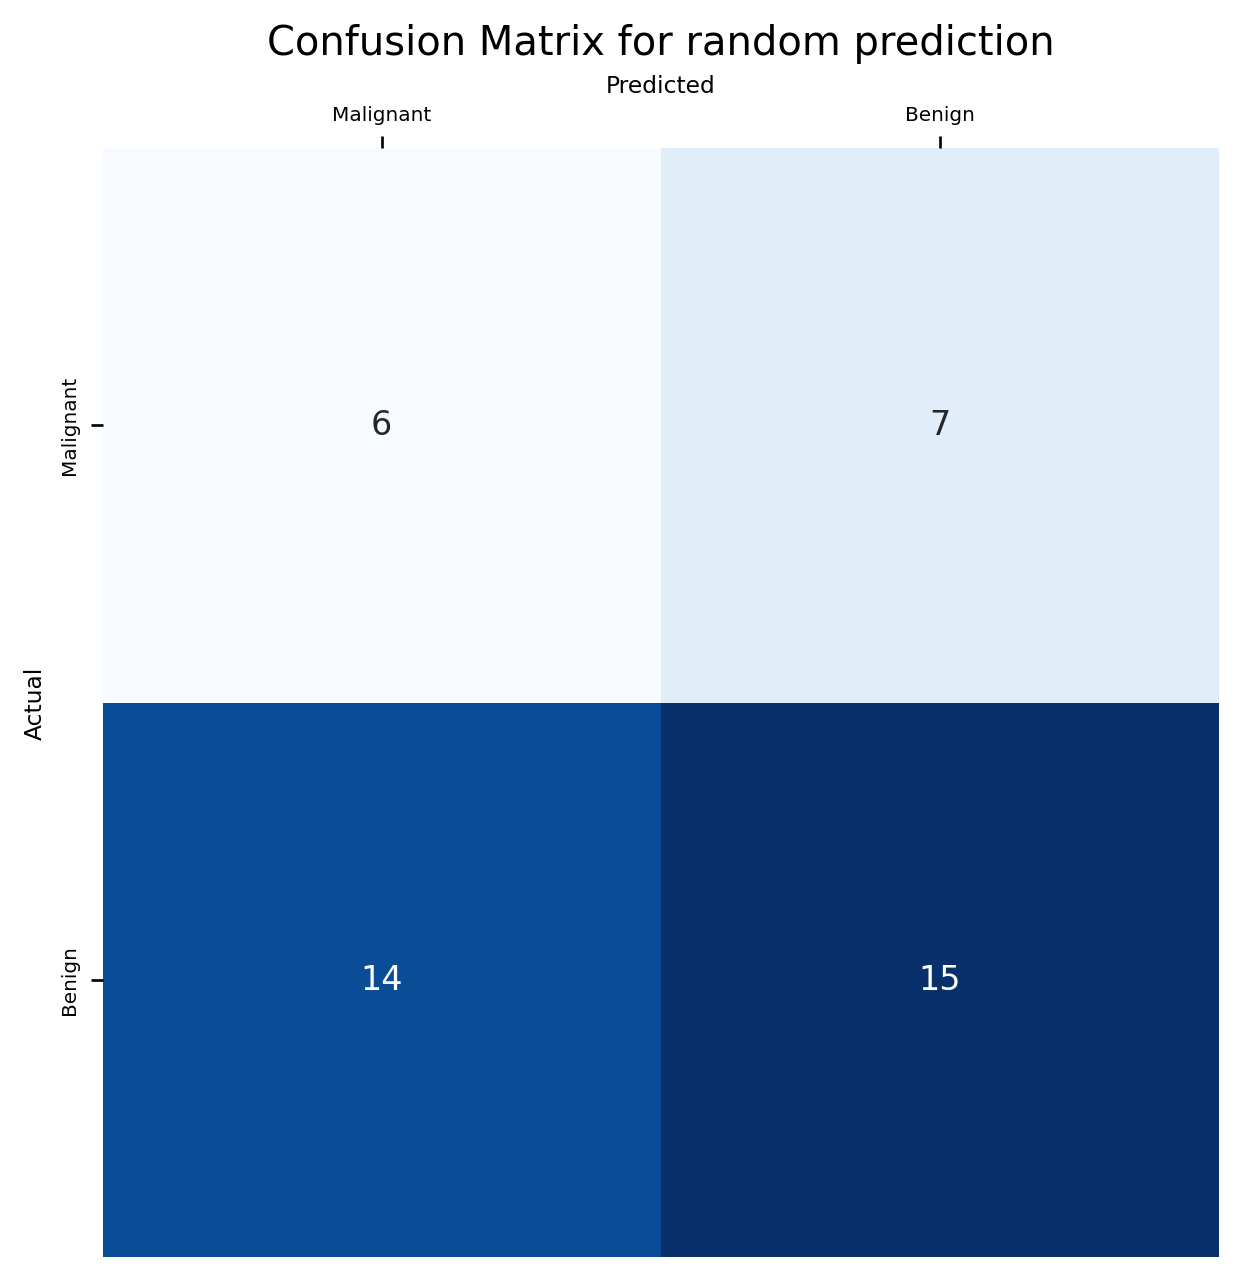

In [232]:
# Baseline model: Random predictions
dummy_clf = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', DummyClassifier(strategy='uniform', random_state=42))])

dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_val)

# Metrics for baseline model
show_result(y_val, y_pred_dummy, "random prediction")

Here we train an SGD classifier as our second baseline model

Accuracy: 0.929
Balanced accuracy: 0.885
Recall: 0.769
Precision: 1.000
AUC: 0.885
F1 score:0.870
Fbeta score(0.1): 0.997
Fbeta score(10): 0.771


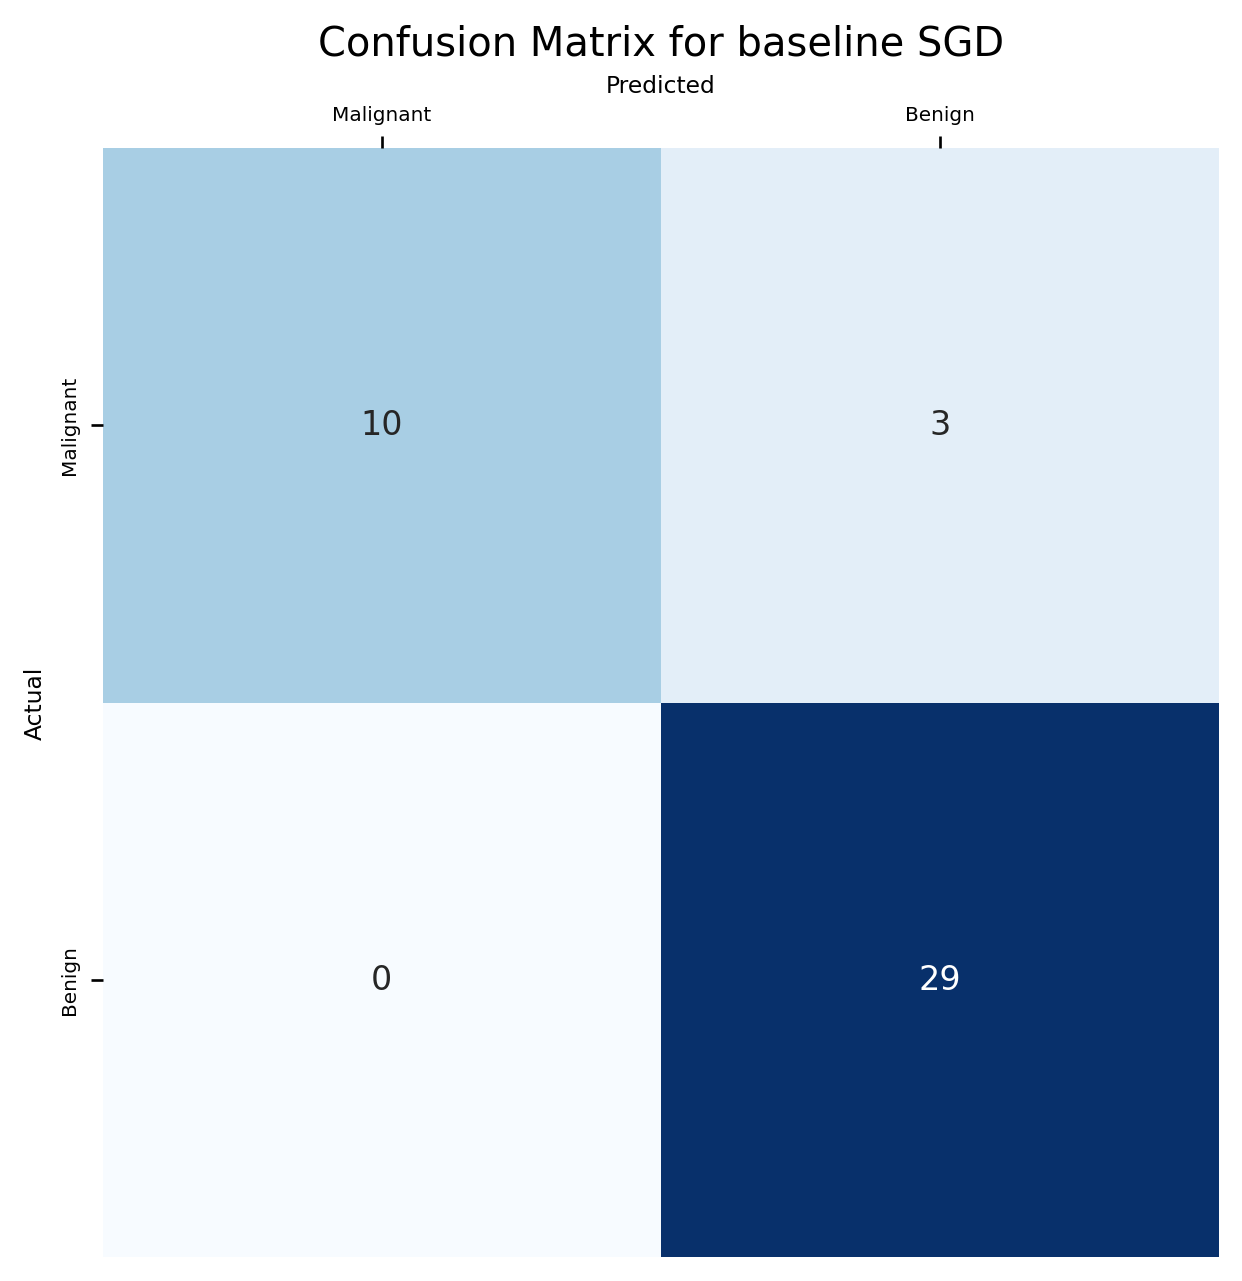

In [233]:
# SGD Classifier
sgd_clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', SGDClassifier(random_state=42))])

sgd_clf.fit(X_train, y_train)
y_pred_sgd = sgd_clf.predict(X_val)

# Metrics for SGD model
show_result(y_val, y_pred_sgd, "baseline SGD")

**Observation and analysis:**
The comparison between the baseline model and the SGD classifier reveals the following:

- Accuracy: The SGD classifier achieves a much higher accuracy than the baseline model, indicating it makes more correct predictions overall.
- Balanced Accuracy: The balanced accuracy of the SGD classifier is significantly greater, demonstrating its superior handling of class imbalance.
- Recall: With a recall rate of 100%, the SGD classifier outperfor ms the baseline model, successfully identifying all positive cases (e.g., malignant tumors).
Precision: The SGD classifier's precision is notably higher, meaning the majority of its positive predictions are correct.
- AUC: The SGD classifier exhibits a substantially higher AUC, indicating better overall classification performance.
- F1 Score and Fbeta Scores: The SGD classifier excels in F1 and Fbeta scores across various β values, showcasing a strong balance between precision and recall.

In summary, the SGD classifier, even without hyper-parameter optimization, significantly outperforms the random prediction baseline model across all metrics, effectively learning from the data and making accurate predictions.

## 3. Model Optimisation [40%]

### 3.1 Performance metric
Choose one performance metric from the above set. State your choice and explain why you chose it. [50 words maximum]

I choose **Balanced Accuracy** because the requirement 1 want us to detect malignant successfully 90% or more (means better recall or sensitivity) and requirement 2 want less false postive rate (means larger specifity), and the balanced accuracy exactly combined both sensitivity and specifity at the same time.

### 3.2 Hyper-parameter optimisation
 - Perform a hyper-parameter optimisation (using appropriate methods) on three models:
   - SGD Classifer
   - SVM
   - One other model of your choice
 - Display the results of each model (including confusion matrices) and choose the best model.
 - Choose the best model and display the final results of this model.

Here I the other one model I choose is random forest classifier, it's advantageous for several reasons:
- Accuracy: Random Forests generally provide high accuracy because they reduce overfitting by averaging multiple decision trees.
- Robustness: They are robust to noise and handle missing values well, making them reliable for a wide range of data.
- Feature Importance: Random Forests can automatically estimate the importance of features, helping to identify which features contribute most to predictions.
- Versatility: They work well for both classification and regression tasks and can handle large datasets with higher dimensionality.
- Avoiding Overfitting: By combining multiple trees, Random Forests help prevent the model from becoming too tailored to the training data, thus improving generalization to new data.

Overall, Random Forests are a strong, versatile choice for many machine learning problems due to their accuracy, robustness, and ability to handle complex datasets.

Here, I choose 3 hyperparameters for each model and several value for each for later gridsearch purpose.

In [243]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

# Define the models and hyper-parameter grids
models = {
    'SGDClassifier': SGDClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42)
}

param_grids = {
    'SGDClassifier': {
        'classifier__alpha': [0.001, 0.005, 0.01],
        'classifier__penalty': ['l2', 'l1', 'elasticnet'],
        'classifier__max_iter': [1000, 500, 100]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf', 'poly'],
        'classifier__gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    }
}

In [244]:
# Function to perform hyper-parameter optimization and evaluation
def optimize_and_evaluate(models, param_grids, X_train, y_train, X_test, y_test):
    best_model = None
    best_model_name = None
    best_performance = -1
    best_param = None
    for model_name in models:
        print(f"Optimizing {model_name}...")
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', models[model_name])])
        grid_search = GridSearchCV(pipeline, param_grids[model_name], scoring='balanced_accuracy', cv=10, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        # Make prediction on the test sety
        y_pred = grid_search.predict(X_test)
        perfromance = balanced_accuracy_score(y_test, y_pred)

        if perfromance > best_performance:
            best_performance = perfromance
            best_model_name = model_name
            best_model = grid_search.best_estimator_
            best_param = grid_search.best_params_
        
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        
        # Show all the result
        show_result(y_test, y_pred, model_name)

    print(f"The best model: {best_model_name}, with hyperparameter {best_param}")
    
    return best_model

Here, we would perform gridsearch with crossvalidation on train data and evaluate using validation data according to the `balanced accuracy`, we will show the performance metric and confusion matrix for each model and then choose the best model.

Optimizing SGDClassifier...
Best parameters for SGDClassifier: {'classifier__alpha': 0.005, 'classifier__max_iter': 1000, 'classifier__penalty': 'elasticnet'}
Accuracy: 0.952
Balanced accuracy: 0.923
Recall: 0.846
Precision: 1.000
AUC: 0.923
F1 score:0.917
Fbeta score(0.1): 0.998
Fbeta score(10): 0.847


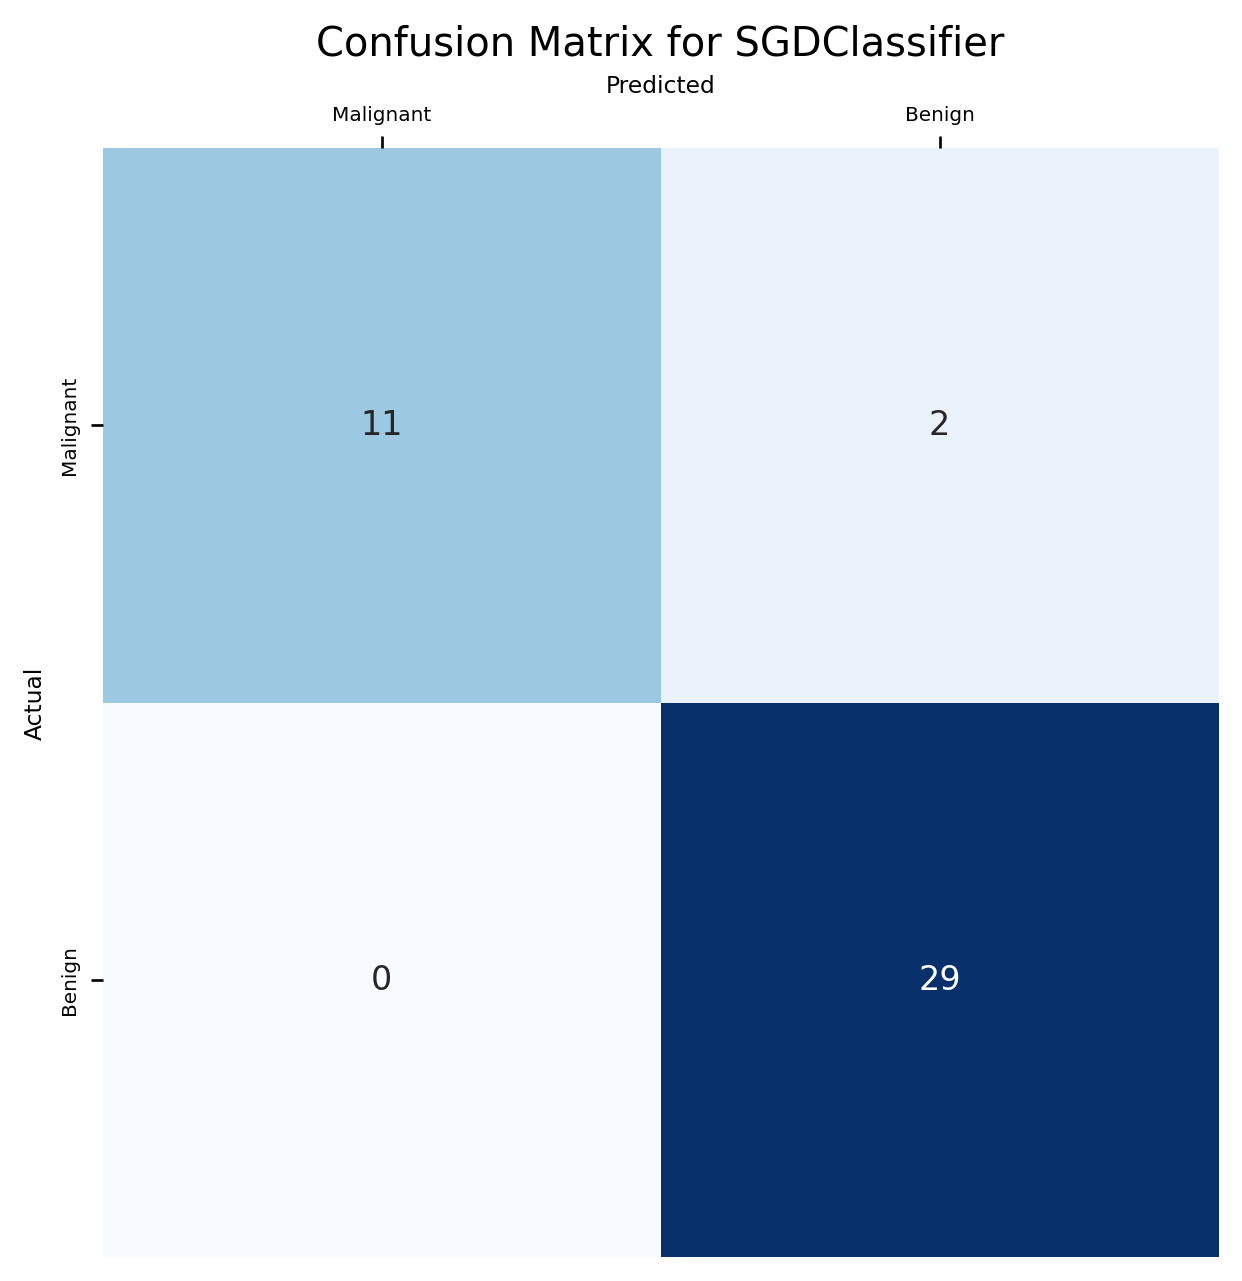

Optimizing SVM...
Best parameters for SVM: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Accuracy: 0.929
Balanced accuracy: 0.885
Recall: 0.769
Precision: 1.000
AUC: 0.885
F1 score:0.870
Fbeta score(0.1): 0.997
Fbeta score(10): 0.771


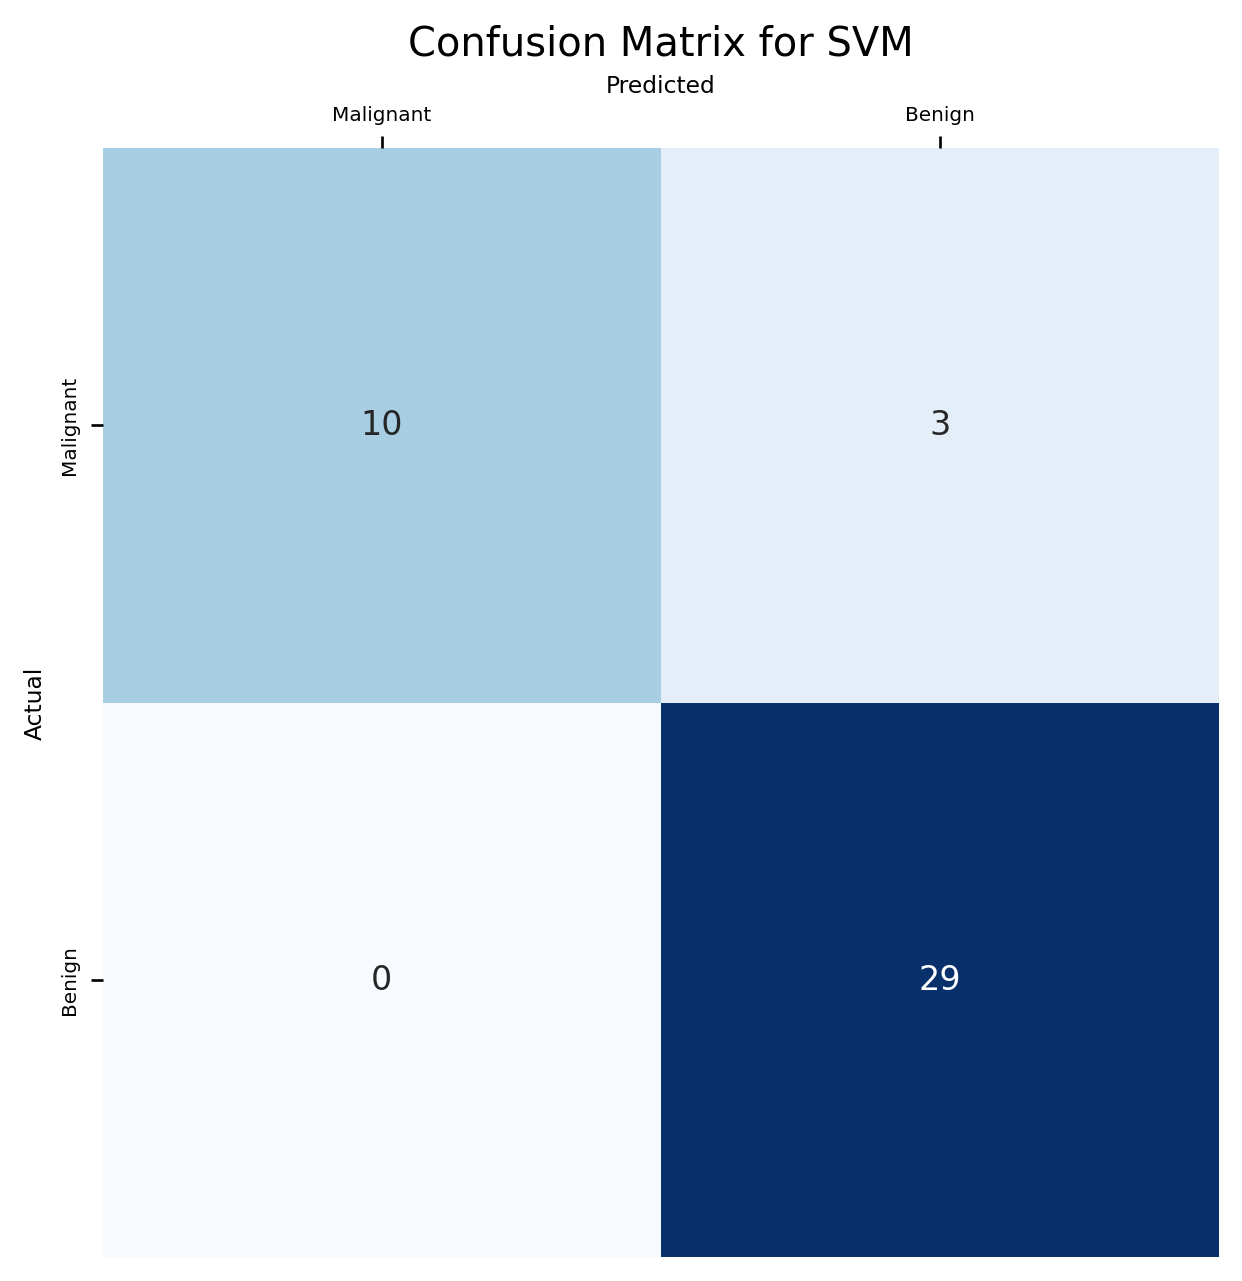

Optimizing RandomForest...
Best parameters for RandomForest: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Accuracy: 0.929
Balanced accuracy: 0.885
Recall: 0.769
Precision: 1.000
AUC: 0.885
F1 score:0.870
Fbeta score(0.1): 0.997
Fbeta score(10): 0.771


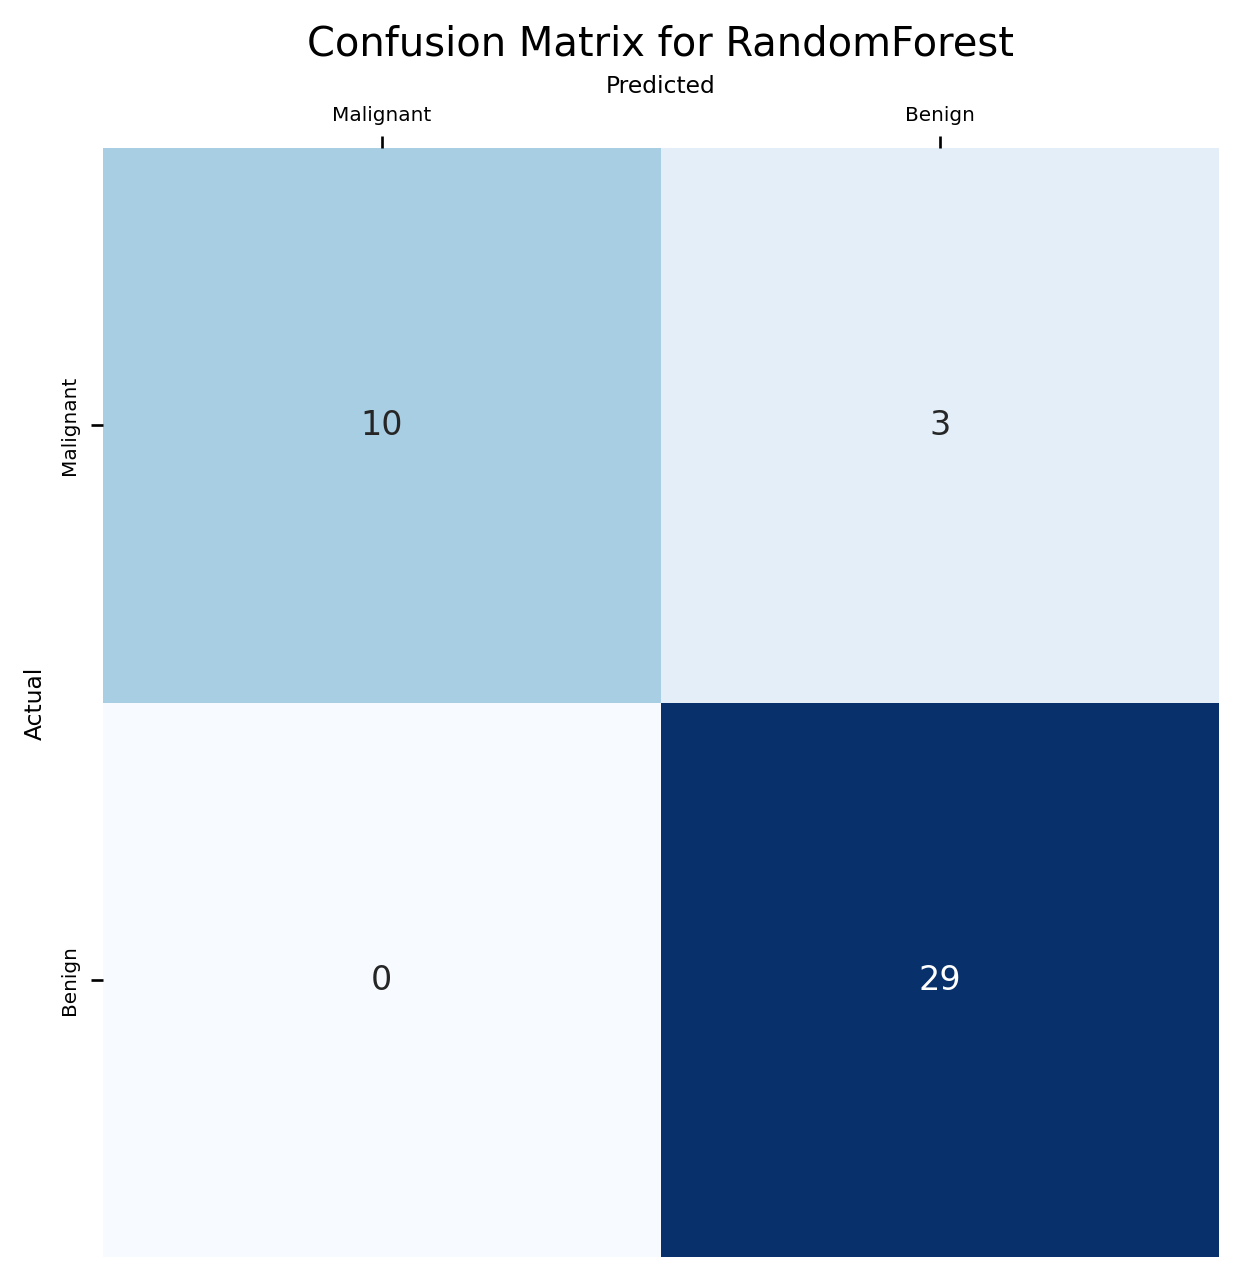

The best model: SGDClassifier, with hyperparameter {'classifier__alpha': 0.005, 'classifier__max_iter': 1000, 'classifier__penalty': 'elasticnet'}


In [245]:
# Perform optimization and evaluation using train and validation set
best_model = optimize_and_evaluate(models, param_grids, X_train, y_train, X_val, y_val)

In [246]:
# Print out the best model
print(best_model)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('classifier',
                 SGDClassifier(alpha=0.005, penalty='elasticnet',
                               random_state=42))])


Based on the result of gridsearch, we will choose the SGD classifier since it has largest balanced accuracy, and also the highest value in every performance metric we compare. Now we will using this model, train the data on the whole training + validation set and then get the final result by testing the model on the test set.

Accuracy: 0.945
Balanced accuracy: 0.943
Recall: 0.938
Precision: 0.882
AUC: 0.943
F1 score:0.909
Fbeta score(0.1): 0.883
Fbeta score(10): 0.937


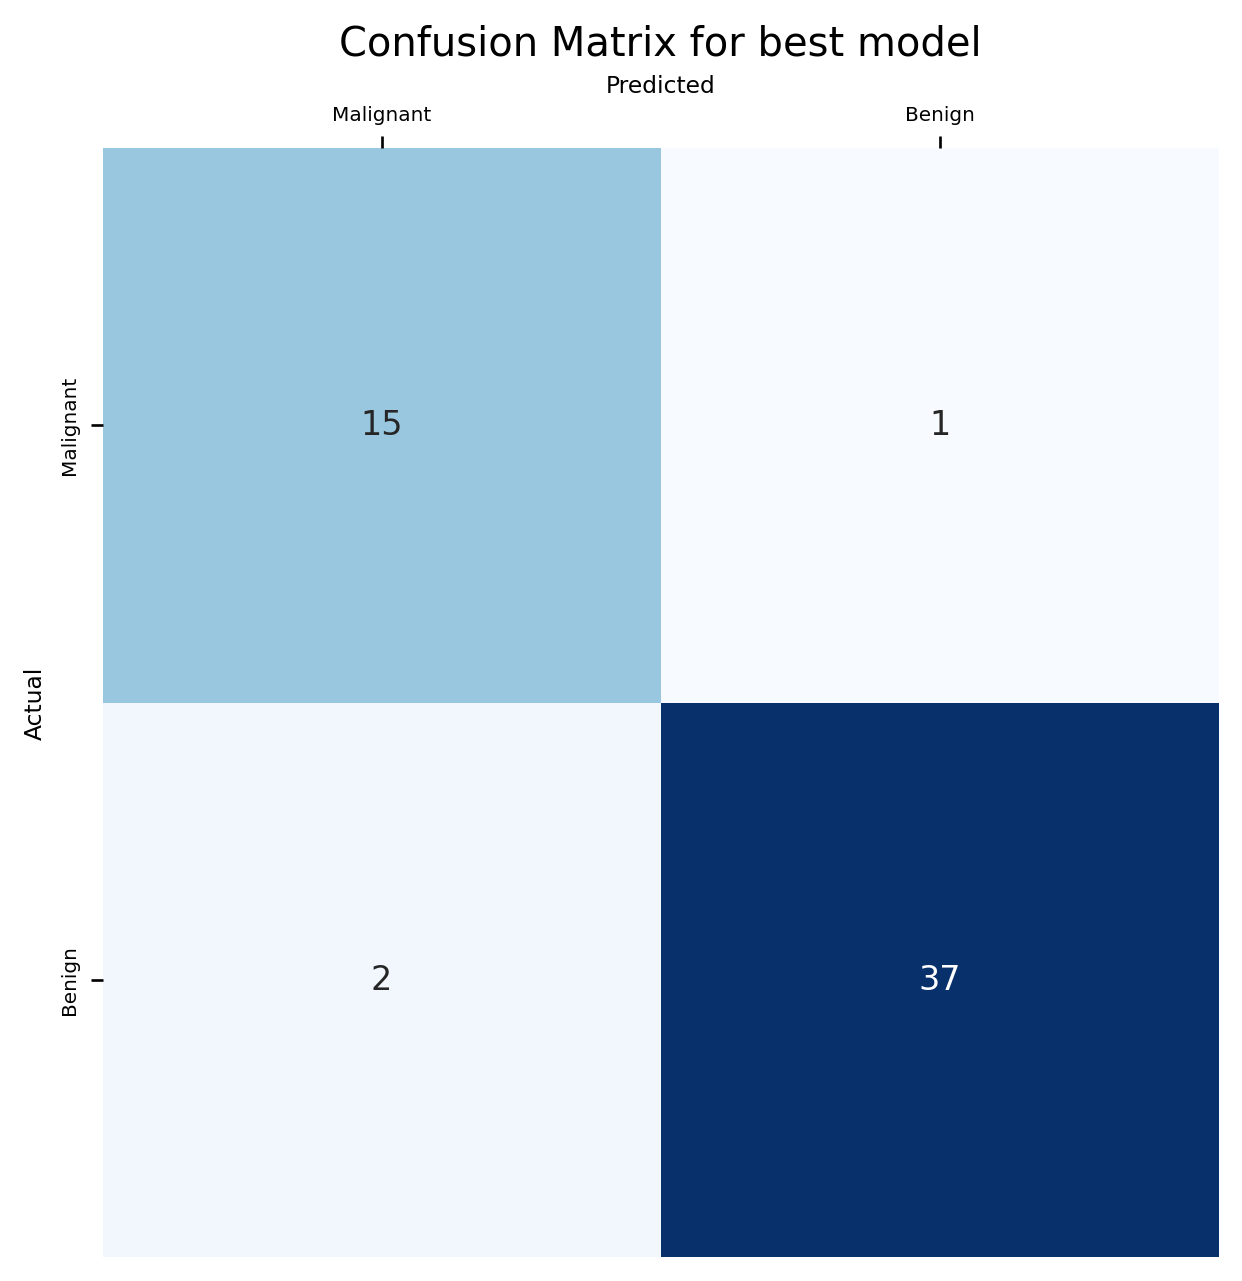

In [247]:
# Get the final result for best model
best_model.fit(X_train_val, y_train_val)
y_pred_best = best_model.predict(X_test)

show_result(y_test, y_pred_best, "best model")

The best model: SGD classifier still performed very very across all performance metrics, achieving a 0.943 balanced accuracy. This indicates that this model has very strong classification capabilities and strong generalization ability on the current dataset.

### 3.3 Final results

From the final results calculate the _probability_ that a sample from a person with a malignant tumour is given a result that they do not have cancer.

**Answer**

From the final result, the number of person with malignant tumour is $15+1=16$, and the number of people detected they do not have cancer is 2. Thus, the _probability_ that a sample from a person with a malignant tumour is given a result that they do not have cancer is: $\frac{1}{16}=0.0625$

## 4. Decision Boundaries [10%]
 - To finish up, the client wants a visualisation of how the final model is working and your line manager has asked you to show some of the decision boundaries.
 - The client also wants to know if your method has met their performance specifications.
 - Follow the next three steps (4.1, 4.2 and 4.3) to do these things.

### 4.1 Discriminative features

Although it is only possible to know the true usefulness of a feature when you've combined it with others in a machine learning method, it is still helpful to have some measure for how discriminative each feature is on its own.  One common method for doing this is to calculate a T-score (often used in statistics, and in the LDA machine learning method) for each feature.  

The formula for the T-score is:

_(mean(x2) - mean(x1))/(0.5*(stddev(x2) + stddev(x1)))_

where x1 and x2 are the feature values corresponding to the two classes. Large values for the T-score (either positive or negative) indicate discriminative ability.

**Calculate the T-score for each feature and print out the best 4 features according to this score.**

In [248]:
# Use the training set to ensure consistency with the data used for model training
X = X_train_val
y = y_train_val

# Calculate T-score for each feature
t_scores = {}
for feature in X.columns:
    group1 = X[feature][y == 0]
    group2 = X[feature][y == 1]
    mean1, mean2 = group1.mean(), group2.mean()
    stddev1, stddev2 = group1.std(), group2.std()
    t_score = (mean2 - mean1) / (0.5 * (stddev2 + stddev1))
    t_scores[feature] = t_score

# Sort features by T-score and print top 4
sorted_t_scores = sorted(t_scores.items(), key=lambda item: abs(item[1]), reverse=True)
top_4_features = sorted_t_scores[:4]

print("Top 4 features based on T-score:")
for feature, score in top_4_features:
    print(f"{feature}: {score:.3f}")

Top 4 features based on T-score:
mean concave points: 2.241
mean perimeter: 1.876
mean radius: 1.793
mean area: 1.769


### 4.2 Visualise decision boundaries

**Display the decision boundaries** for each pair of features from the best 4 chosen above.  You can use the functions below to help if you like.

Instead of using the simple mean as the input for `xmean` in `plot_contours`, use the following:

_0.5*(mean(x1) + mean(x2))_

where x1 and x2 are the data associated with the two classes.  This way of calculating a "mean" point takes into account any imbalance between the classes.

In [113]:
def make_meshgrid(x, y, ns=100):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on (only min and max used)
    y: data to base y-axis meshgrid on (only min and max used)
    ns: number of steps in grid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    hx = (x_max - x_min)/ns
    hy = (y_max - y_min)/ns
    xx, yy = np.meshgrid(np.arange(x_min, x_max + hx, hx), np.arange(y_min, y_max + hy, hy))
    return xx, yy

In [114]:
def plot_contours(clf, xx, yy, xmean, n1, n2, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    xmean : 1d array of N mean values (used to populate constant features with)
    n1, n2: index numbers of features that change
              that is, which features xx and yy represent, from the set of N features
    params: dictionary of params to pass to contourf, optional
    """
    # The following lines makes an MxN matrix to pass to the classifier (# samples x # features)
    # It does this by multiplying Mx1 and 1xN matrices, where the former is filled with 1's
    #  where M is the number of grid points in xx and N is the number of features in xmean
    #  It is done in such a way that the xmean vector is replaced in each row
    fullx = np.ones((xx.ravel().shape[0],1)) * np.reshape(xmean,(1,-1))
    fullx[:,n1] = xx.ravel()
    fullx[:,n2] = yy.ravel()
    Z = clf.predict(fullx)
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [279]:
top_4_features

[('mean concave points', 2.241249288227939),
 ('mean perimeter', 1.8759527364660962),
 ('mean radius', 1.793105974366219),
 ('mean area', 1.7685696212492497)]

In [ ]:
# Calculate mean values for the features
means_class_1 = X_train[y_train == 1].mean(axis=0)
means_class_0 = X_train[y_train == 0].mean(axis=0)
xmean = 0.5 * (means_class_1 + means_class_0)

# Generate decision boundary plots for each unique pair of top features
from itertools import combinations

feature_names = [feature[0] for feature in top_4_features]

for (feature_1, feature_2) in combinations(feature_names, 2):
    i, j = X.columns.get_loc(feature_1), X.columns.get_loc(feature_2)
    
    X0, X1 = X_train.iloc[:, i], X_train.iloc[:, j]
    xx, yy = make_meshgrid(X0, X1)
    
    plt.figure(figsize=(10, 8))
    plot_contours(best_model, xx, yy, xmean.values, i, j, cmap=plt.cm.coolwarm, alpha=0.8)
    
    sns.scatterplot(x=X_train[feature_1], y=X_train[feature_2], hue=y_train, palette='coolwarm', edgecolor='k', s=50)
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.title(f'Decision Boundary for {feature_1} vs {feature_2}')
    plt.show()

In [282]:
# Iterate through pairs of the top 4 features
for i in range(len(top_4_features)):
    for j in range(i + 1, len(top_4_features)):
        feature1 = top_4_features[i][0]
        feature2 = top_4_features[j][0]

        # Create the SGD classifier
        clf = Pipeline([('preprocessing_pipeline', Preprocessing_pipeline),
                         ('Classifier', SGDClassifier(random_state=42))
                         ])
        X_pair = data[[feature1, feature2]]
        clf.fit(X_pair, y)

        # Create the meshgrid
        xx, yy = make_meshgrid(X_pair[feature1], X_pair[feature2])

        # Calculate the mean point
        x1 = data[data['label'] == 'benign'][[feature1, feature2]]
        x2 = data[data['label'] == 'malignant'][[feature1, feature2]]
        xmean = 0.5 * (x1.mean() + x2.mean())

        # Plot the decision boundaries
        plt.figure(figsize=(10, 6))
        plot_contours(clf, xx, yy, xmean.values.flatten(), 0, 1, alpha=0.8)
        sns.scatterplot(x=feature1, y=feature2, hue='label', data=data, palette='Set1', edgecolor='k')
        plt.title(f'Decision Boundaries for {feature1} vs {feature2}')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.legend(loc='upper right')
        plt.show()

ValueError: X has 2 features, but SimpleImputer is expecting 20 features as input.

<Figure size 2400x1440 with 0 Axes>

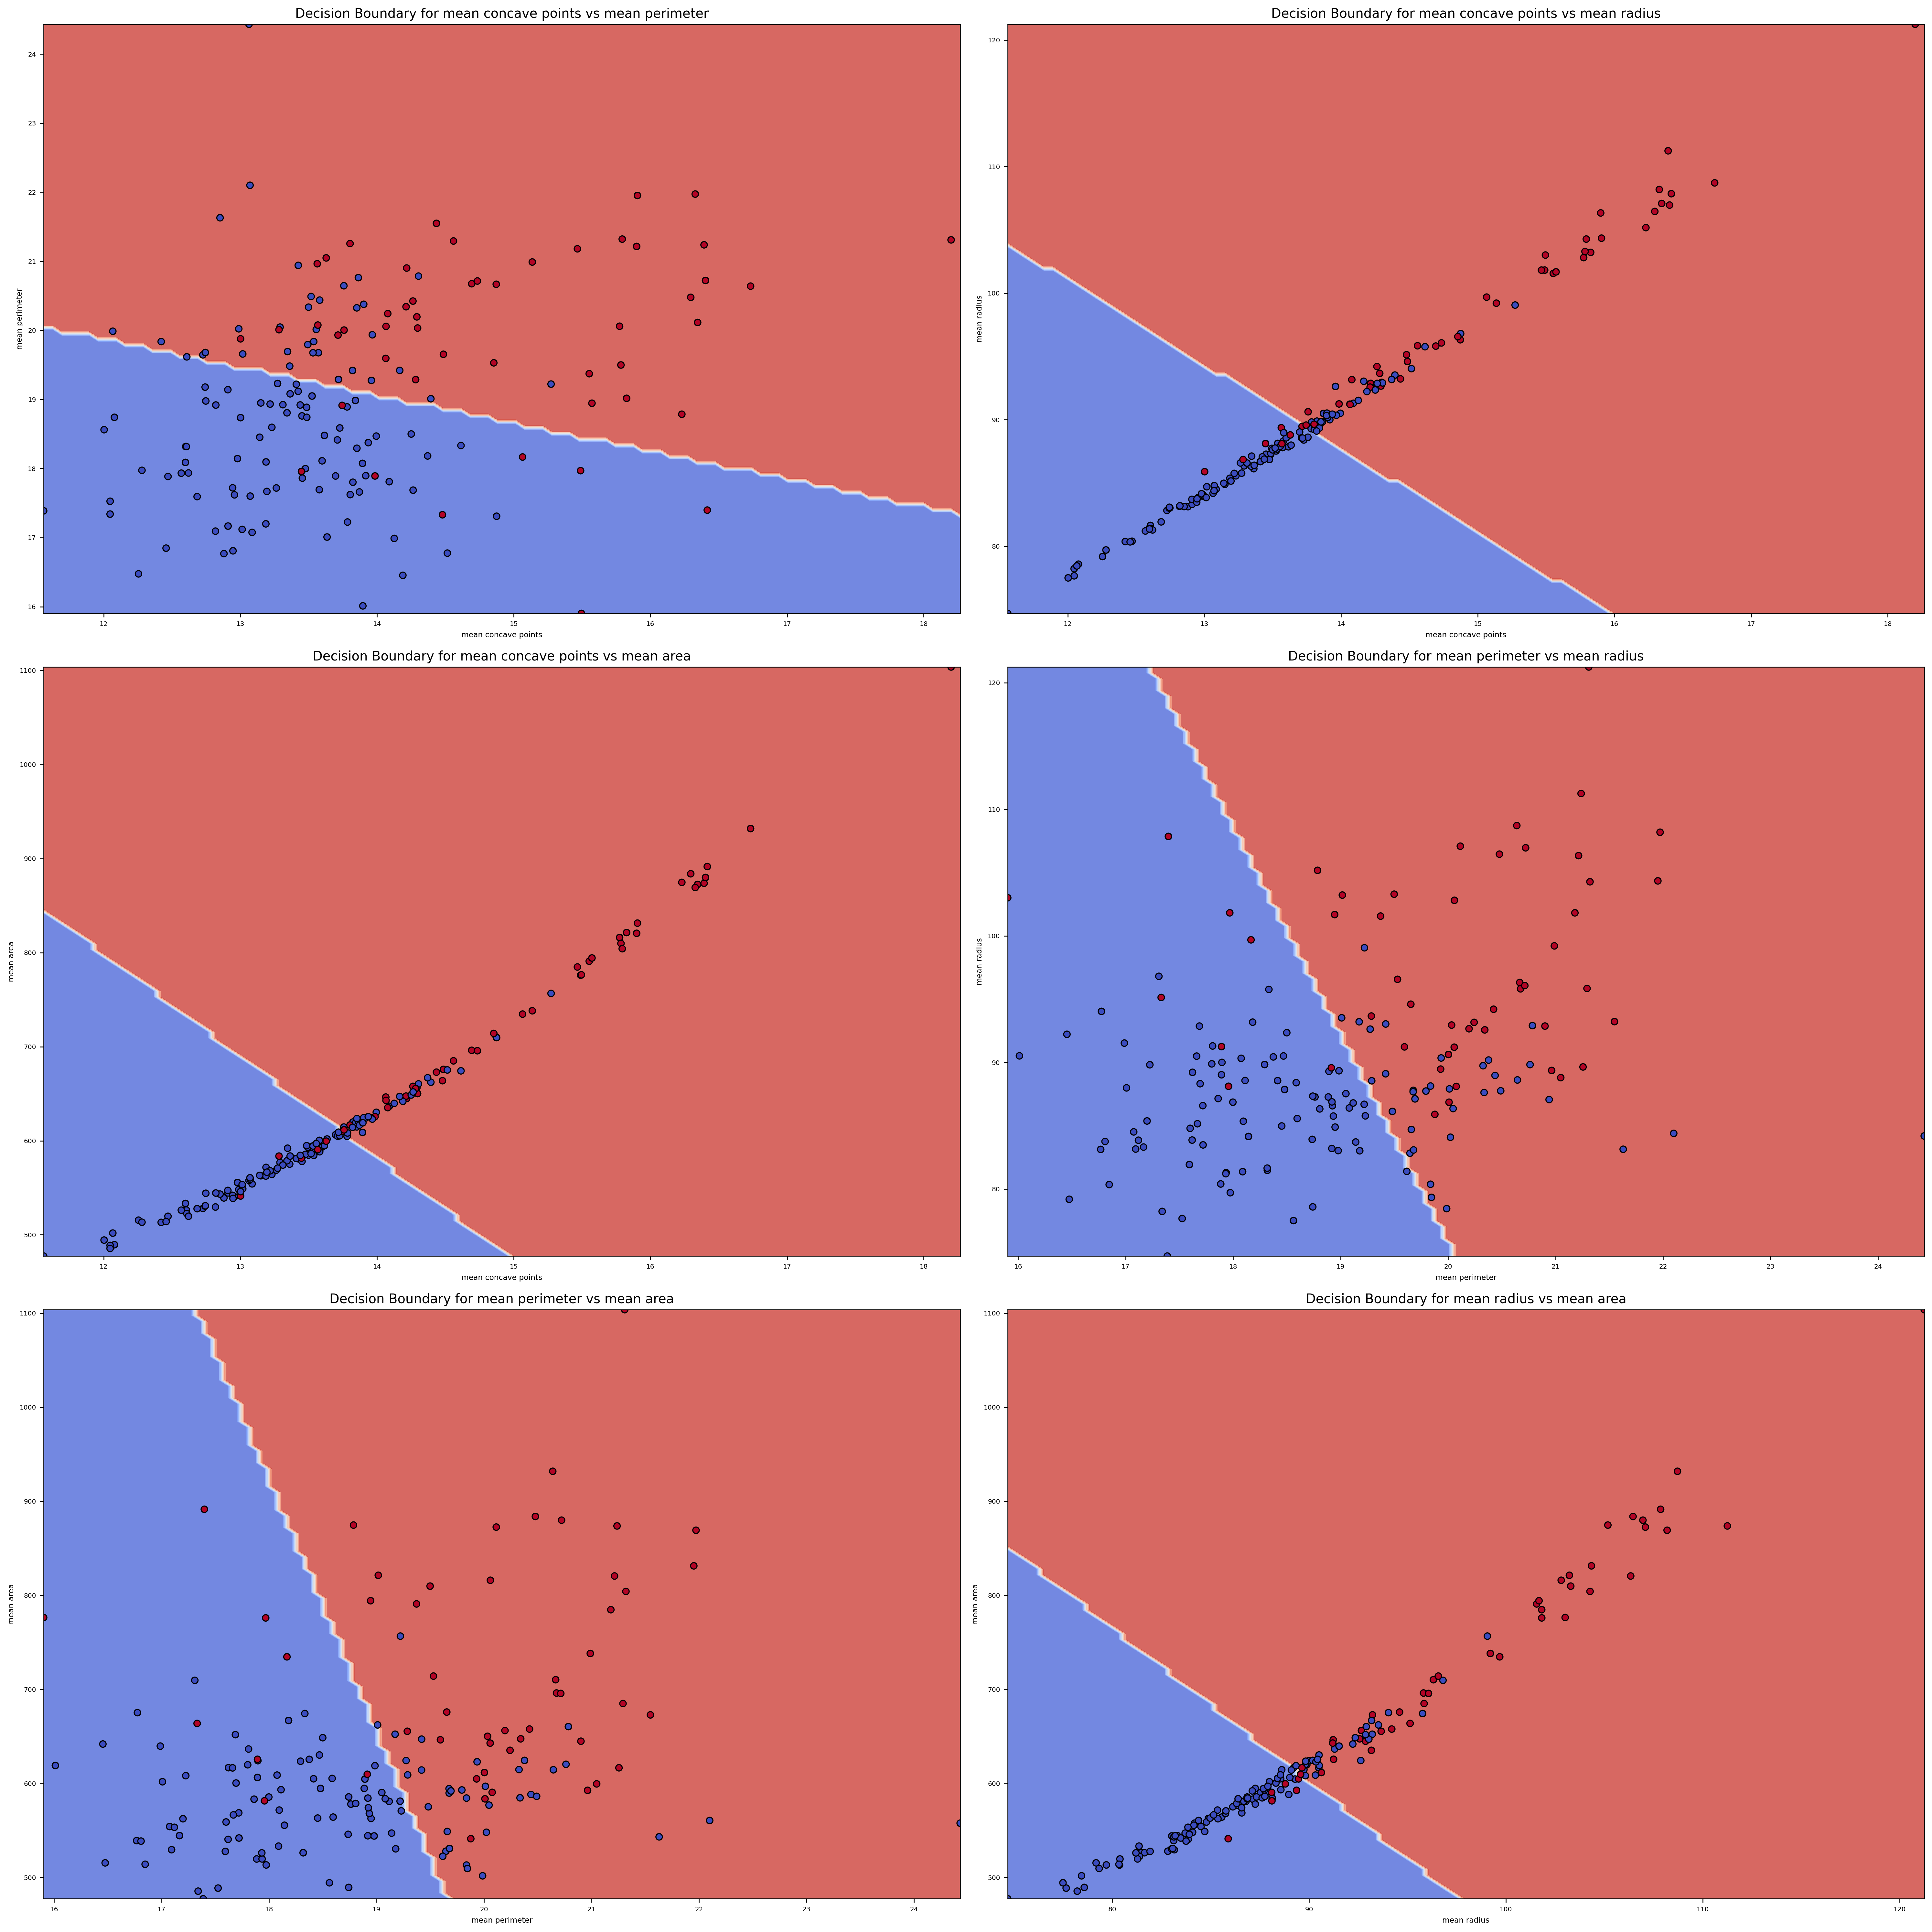

In [283]:
import warnings
warnings.filterwarnings('ignore')

# calculate xmean
feature_pairs = [(i, j) for i in range(len(top_4_features)) for j in range(i+1, len(top_4_features))]
xmean = 0.5 * (X_train_val[y_train_val == 0].mean(axis=0) + X_train_val[y_train_val == 1].mean(axis=0))

plt.figure(figsize=(25, 25))
for idx, (i, j) in enumerate(feature_pairs, 1):
    xx, yy = make_meshgrid(X_train_val.iloc[:, i], X_train_val.iloc[:, j])
    plt.subplot(len(feature_pairs) // 2, 2, idx)
    plot_contours(best_model, xx, yy, xmean, i, j, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_train_val.iloc[:, i], X_train_val.iloc[:, j], c=y_train_val, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel(top_4_features[i][0])
    plt.ylabel(top_4_features[j][0])
    plt.title(f"Decision Boundary for {top_4_features[i][0]} vs {top_4_features[j][0]}")

plt.tight_layout()
plt.show()

### 4.3 Performance specification
**Does the final model meet the client's criteria?  Explain why or why not.** [100 words maximum]

**Answer**

The client's requirements are:
- Have at least a 90% probability of detecting malignant cancer when it is present;
- Ensure that no more than 1 in 5 healthy cases (those with benign growths) result in a false positive (labeled as malignant).

The model performance:
1. When the malignant cancer present, the final model have $\frac{15}{15+1} = 93.75\%$ probability to detect it, which is greater than 90%, so the final model meets requirement 1
2. There's only 2 healthy cases result in a false positive out of 39 cases, $\frac{2}{39}=5.13\%$, which is smaller than 20% (no more than 1 in 5), so the final model meets requirement 2

In summary the final model meet the client's criteria since it meets both requirements.

## Reference

- Elkington, L, Adhikari, P & Pradhan, P 2022, ‘Fractal Dimension Analysis to Detect the Progress of Cancer Using Transmission Optical Microscopy’, Biophysica, vol. 2, no. 1, pp. 59–69.